In [1]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torchsummary import summary

## Two Layer net with 50 nodes in each and tanh() as activation function

In [2]:
# Set the device for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
input_size = 28 * 28  # MNIST image size is 28x28
hidden_size = 50
num_classes = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 10

# Load the MNIST dataset
train_dataset = MNIST(root='data/', train=True, transform=ToTensor(), download=True)

# Split dataset into train and test
train_size = int(0.67 * len(train_dataset))
test_size = len(train_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(train_dataset, [train_size, test_size])

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Define the neural network architecture
class TwoLayerNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(TwoLayerNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.activation = nn.Tanh()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.activation(out)
        out = self.fc2(out)
        return out

# Initialize the model
model = TwoLayerNet(input_size, hidden_size, num_classes).to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}")

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

# Store accuracy in the dictionary with the three-tuple as the key
accuracies = {(2, hidden_size, 't'): accuracy}

# Print the summary of the model
summary(model, (input_size,))

# Plot accuracies
labels_graph = ['2 Layers, 50 Nodes, Tanh']
accuracies_values = [accuracy]

Epoch [1/10], Step [100/629], Loss: 0.6267
Epoch [1/10], Step [200/629], Loss: 0.6351
Epoch [1/10], Step [300/629], Loss: 0.4902
Epoch [1/10], Step [400/629], Loss: 0.2730
Epoch [1/10], Step [500/629], Loss: 0.4448
Epoch [1/10], Step [600/629], Loss: 0.2097
Epoch [2/10], Step [100/629], Loss: 0.3631
Epoch [2/10], Step [200/629], Loss: 0.0926
Epoch [2/10], Step [300/629], Loss: 0.1667
Epoch [2/10], Step [400/629], Loss: 0.2148
Epoch [2/10], Step [500/629], Loss: 0.1321
Epoch [2/10], Step [600/629], Loss: 0.2322
Epoch [3/10], Step [100/629], Loss: 0.2155
Epoch [3/10], Step [200/629], Loss: 0.1142
Epoch [3/10], Step [300/629], Loss: 0.2106
Epoch [3/10], Step [400/629], Loss: 0.1521
Epoch [3/10], Step [500/629], Loss: 0.1937
Epoch [3/10], Step [600/629], Loss: 0.1423
Epoch [4/10], Step [100/629], Loss: 0.1690
Epoch [4/10], Step [200/629], Loss: 0.1110
Epoch [4/10], Step [300/629], Loss: 0.5330
Epoch [4/10], Step [400/629], Loss: 0.0918
Epoch [4/10], Step [500/629], Loss: 0.1202
Epoch [4/10

## Two Layer net with 60 nodes in each and tanh() as activation function

In [3]:
# Set the device for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
input_size = 28 * 28  # MNIST image size is 28x28
hidden_size = 60
num_classes = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 10

# Load the MNIST dataset
train_dataset = MNIST(root='data/', train=True, transform=ToTensor(), download=True)

# Split dataset into train and test
train_size = int(0.67 * len(train_dataset))
test_size = len(train_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(train_dataset, [train_size, test_size])

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Define the neural network architecture
class TwoLayerNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(TwoLayerNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.activation = nn.Tanh()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.activation(out)
        out = self.fc2(out)
        return out

# Initialize the model
model = TwoLayerNet(input_size, hidden_size, num_classes).to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}")

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

# Store accuracy in the dictionary with the three-tuple as the key
accuracies = {(2, hidden_size, 't'): accuracy}

# Print the summary of the model
summary(model, (input_size,))

# Plot accuracies
if not isinstance(labels_graph, list):
    labels_graph = labels_graph.tolist()
labels_graph.append('2 Layers, 60 Nodes, Tanh')
accuracies_values.append(accuracy)

Epoch [1/10], Step [100/629], Loss: 0.6365
Epoch [1/10], Step [200/629], Loss: 0.5250
Epoch [1/10], Step [300/629], Loss: 0.2632
Epoch [1/10], Step [400/629], Loss: 0.4419
Epoch [1/10], Step [500/629], Loss: 0.2265
Epoch [1/10], Step [600/629], Loss: 0.2866
Epoch [2/10], Step [100/629], Loss: 0.3093
Epoch [2/10], Step [200/629], Loss: 0.2990
Epoch [2/10], Step [300/629], Loss: 0.3896
Epoch [2/10], Step [400/629], Loss: 0.1071
Epoch [2/10], Step [500/629], Loss: 0.2582
Epoch [2/10], Step [600/629], Loss: 0.0747
Epoch [3/10], Step [100/629], Loss: 0.2092
Epoch [3/10], Step [200/629], Loss: 0.1306
Epoch [3/10], Step [300/629], Loss: 0.2022
Epoch [3/10], Step [400/629], Loss: 0.0936
Epoch [3/10], Step [500/629], Loss: 0.2348
Epoch [3/10], Step [600/629], Loss: 0.1449
Epoch [4/10], Step [100/629], Loss: 0.1174
Epoch [4/10], Step [200/629], Loss: 0.0889
Epoch [4/10], Step [300/629], Loss: 0.0425
Epoch [4/10], Step [400/629], Loss: 0.1806
Epoch [4/10], Step [500/629], Loss: 0.0608
Epoch [4/10

## Two Layer net with 75 nodes in each and tanh() as activation function

In [4]:
# Set the device for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
input_size = 28 * 28  # MNIST image size is 28x28
hidden_size = 75
num_classes = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 10

# Load the MNIST dataset
train_dataset = MNIST(root='data/', train=True, transform=ToTensor(), download=True)

# Split dataset into train and test
train_size = int(0.67 * len(train_dataset))
test_size = len(train_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(train_dataset, [train_size, test_size])

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Define the neural network architecture
class TwoLayerNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(TwoLayerNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.activation = nn.Tanh()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.activation(out)
        out = self.fc2(out)
        return out

# Initialize the model
model = TwoLayerNet(input_size, hidden_size, num_classes).to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}")

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

# Store accuracy in the dictionary with the three-tuple as the key
accuracies = {(2, hidden_size, 't'): accuracy}

# Print the summary of the model
summary(model, (input_size,))

# Plot accuracies
if not isinstance(labels_graph, list):
    labels_graph = labels_graph.tolist()
labels_graph.append('2 Layers, 75 Nodes, Tanh')
accuracies_values.append(accuracy)

Epoch [1/10], Step [100/629], Loss: 0.6570
Epoch [1/10], Step [200/629], Loss: 0.3882
Epoch [1/10], Step [300/629], Loss: 0.5006
Epoch [1/10], Step [400/629], Loss: 0.3554
Epoch [1/10], Step [500/629], Loss: 0.2201
Epoch [1/10], Step [600/629], Loss: 0.2600
Epoch [2/10], Step [100/629], Loss: 0.2338
Epoch [2/10], Step [200/629], Loss: 0.2279
Epoch [2/10], Step [300/629], Loss: 0.2559
Epoch [2/10], Step [400/629], Loss: 0.1767
Epoch [2/10], Step [500/629], Loss: 0.1430
Epoch [2/10], Step [600/629], Loss: 0.2399
Epoch [3/10], Step [100/629], Loss: 0.1151
Epoch [3/10], Step [200/629], Loss: 0.0674
Epoch [3/10], Step [300/629], Loss: 0.2233
Epoch [3/10], Step [400/629], Loss: 0.1686
Epoch [3/10], Step [500/629], Loss: 0.1091
Epoch [3/10], Step [600/629], Loss: 0.1443
Epoch [4/10], Step [100/629], Loss: 0.1678
Epoch [4/10], Step [200/629], Loss: 0.0697
Epoch [4/10], Step [300/629], Loss: 0.1350
Epoch [4/10], Step [400/629], Loss: 0.1311
Epoch [4/10], Step [500/629], Loss: 0.0924
Epoch [4/10

## Three Layer net with 33 nodes in each and tanh() as activation function

In [5]:
# Set the device for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
input_size = 28 * 28  # MNIST image size is 28x28
hidden_size = 33
num_classes = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 10

# Load the MNIST dataset
train_dataset = MNIST(root='data/', train=True, transform=ToTensor(), download=True)

# Split dataset into train and test
train_size = int(0.67 * len(train_dataset))
test_size = len(train_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(train_dataset, [train_size, test_size])

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Define the neural network architecture
class ThreeLayerNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(ThreeLayerNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.activation = nn.Tanh()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.activation(out)
        out = self.fc2(out)
        out = self.activation(out)
        out = self.fc3(out)
        return out

# Initialize the model
model = ThreeLayerNet(input_size, hidden_size, num_classes).to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}")

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

# Store accuracy in the dictionary with the three-tuple as the key
accuracies[(3, hidden_size, 't')] = accuracy

# Print the summary of the model
summary(model, (input_size,))

# Plot accuracies
if not isinstance(labels_graph, list):
    labels_graph = labels_graph.tolist()
labels_graph.append('3 Layers, 33 Nodes, Tanh')
accuracies_values.append(accuracy)

Epoch [1/10], Step [100/629], Loss: 0.7895
Epoch [1/10], Step [200/629], Loss: 0.4548
Epoch [1/10], Step [300/629], Loss: 0.3303
Epoch [1/10], Step [400/629], Loss: 0.3532
Epoch [1/10], Step [500/629], Loss: 0.2151
Epoch [1/10], Step [600/629], Loss: 0.2154
Epoch [2/10], Step [100/629], Loss: 0.3738
Epoch [2/10], Step [200/629], Loss: 0.1556
Epoch [2/10], Step [300/629], Loss: 0.3089
Epoch [2/10], Step [400/629], Loss: 0.3092
Epoch [2/10], Step [500/629], Loss: 0.0852
Epoch [2/10], Step [600/629], Loss: 0.2480
Epoch [3/10], Step [100/629], Loss: 0.2243
Epoch [3/10], Step [200/629], Loss: 0.1020
Epoch [3/10], Step [300/629], Loss: 0.1236
Epoch [3/10], Step [400/629], Loss: 0.1502
Epoch [3/10], Step [500/629], Loss: 0.1394
Epoch [3/10], Step [600/629], Loss: 0.0413
Epoch [4/10], Step [100/629], Loss: 0.2382
Epoch [4/10], Step [200/629], Loss: 0.1542
Epoch [4/10], Step [300/629], Loss: 0.1061
Epoch [4/10], Step [400/629], Loss: 0.0420
Epoch [4/10], Step [500/629], Loss: 0.3198
Epoch [4/10

## Three Layer net with 50 nodes in each and tanh() as activation function

In [6]:
# Set the device for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
input_size = 28 * 28  # MNIST image size is 28x28
hidden_size = 50
num_classes = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 10

# Load the MNIST dataset
train_dataset = MNIST(root='data/', train=True, transform=ToTensor(), download=True)

# Split dataset into train and test
train_size = int(0.67 * len(train_dataset))
test_size = len(train_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(train_dataset, [train_size, test_size])

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Define the neural network architecture
class ThreeLayerNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(ThreeLayerNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.activation = nn.Tanh()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.activation(out)
        out = self.fc2(out)
        out = self.activation(out)
        out = self.fc3(out)
        return out

# Initialize the model
model = ThreeLayerNet(input_size, hidden_size, num_classes).to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}")

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

# Store accuracy in the dictionary with the three-tuple as the key
accuracies[(3, hidden_size, 't')] = accuracy

# Print the summary of the model
summary(model, (input_size,))

# Plot accuracies
if not isinstance(labels_graph, list):
    labels_graph = labels_graph.tolist()
labels_graph.append('3 Layers, 50 Nodes, Tanh')
accuracies_values.append(accuracy)

Epoch [1/10], Step [100/629], Loss: 0.6101
Epoch [1/10], Step [200/629], Loss: 0.4203
Epoch [1/10], Step [300/629], Loss: 0.3093
Epoch [1/10], Step [400/629], Loss: 0.2440
Epoch [1/10], Step [500/629], Loss: 0.3811
Epoch [1/10], Step [600/629], Loss: 0.1585
Epoch [2/10], Step [100/629], Loss: 0.3184
Epoch [2/10], Step [200/629], Loss: 0.0747
Epoch [2/10], Step [300/629], Loss: 0.2237
Epoch [2/10], Step [400/629], Loss: 0.1321
Epoch [2/10], Step [500/629], Loss: 0.0593
Epoch [2/10], Step [600/629], Loss: 0.2159
Epoch [3/10], Step [100/629], Loss: 0.1720
Epoch [3/10], Step [200/629], Loss: 0.1081
Epoch [3/10], Step [300/629], Loss: 0.0642
Epoch [3/10], Step [400/629], Loss: 0.1091
Epoch [3/10], Step [500/629], Loss: 0.0794
Epoch [3/10], Step [600/629], Loss: 0.0858
Epoch [4/10], Step [100/629], Loss: 0.1504
Epoch [4/10], Step [200/629], Loss: 0.1754
Epoch [4/10], Step [300/629], Loss: 0.0936
Epoch [4/10], Step [400/629], Loss: 0.2575
Epoch [4/10], Step [500/629], Loss: 0.1244
Epoch [4/10

## Two Layer net with 50 nodes in each layer and sigmoid() activation function

In [7]:
# Set the device for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
input_size = 28 * 28  # MNIST image size is 28x28
hidden_size = 50
num_classes = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 10

# Load the MNIST dataset
train_dataset = MNIST(root='data/', train=True, transform=ToTensor(), download=True)

# Split dataset into train and test
train_size = int(0.67 * len(train_dataset))
test_size = len(train_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(train_dataset, [train_size, test_size])

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Define the neural network architecture
class TwoLayerNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(TwoLayerNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.activation = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.activation(out)
        out = self.fc2(out)
        return out

# Initialize the model
model = TwoLayerNet(input_size, hidden_size, num_classes).to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}")

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

# Store accuracy in the dictionary with the three-tuple as the key
accuracies[(2, hidden_size, 's')] = accuracy

# Print the summary of the model
summary(model, (input_size,))

# Plot accuracies
if not isinstance(labels_graph, list):
    labels_graph = labels_graph.tolist()
labels_graph.append('2 Layers, 50 Nodes, Sigmoid')
accuracies_values.append(accuracy)

Epoch [1/10], Step [100/629], Loss: 1.3955
Epoch [1/10], Step [200/629], Loss: 0.9261
Epoch [1/10], Step [300/629], Loss: 0.6345
Epoch [1/10], Step [400/629], Loss: 0.5689
Epoch [1/10], Step [500/629], Loss: 0.4039
Epoch [1/10], Step [600/629], Loss: 0.4382
Epoch [2/10], Step [100/629], Loss: 0.4099
Epoch [2/10], Step [200/629], Loss: 0.2602
Epoch [2/10], Step [300/629], Loss: 0.3783
Epoch [2/10], Step [400/629], Loss: 0.2658
Epoch [2/10], Step [500/629], Loss: 0.2410
Epoch [2/10], Step [600/629], Loss: 0.2531
Epoch [3/10], Step [100/629], Loss: 0.2679
Epoch [3/10], Step [200/629], Loss: 0.4020
Epoch [3/10], Step [300/629], Loss: 0.3813
Epoch [3/10], Step [400/629], Loss: 0.2325
Epoch [3/10], Step [500/629], Loss: 0.2226
Epoch [3/10], Step [600/629], Loss: 0.1944
Epoch [4/10], Step [100/629], Loss: 0.3113
Epoch [4/10], Step [200/629], Loss: 0.2577
Epoch [4/10], Step [300/629], Loss: 0.1907
Epoch [4/10], Step [400/629], Loss: 0.3103
Epoch [4/10], Step [500/629], Loss: 0.3105
Epoch [4/10

## Two Layer net with 60 nodes in each layer and sigmoid() activation function

In [8]:
# Set the device for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
input_size = 28 * 28  # MNIST image size is 28x28
hidden_size = 60
num_classes = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 10

# Load the MNIST dataset
train_dataset = MNIST(root='data/', train=True, transform=ToTensor(), download=True)

# Split dataset into train and test
train_size = int(0.67 * len(train_dataset))
test_size = len(train_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(train_dataset, [train_size, test_size])

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Define the neural network architecture
class TwoLayerNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(TwoLayerNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.activation = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.activation(out)
        out = self.fc2(out)
        return out

# Initialize the model
model = TwoLayerNet(input_size, hidden_size, num_classes).to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}")

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

# Store accuracy in the dictionary with the three-tuple as the key
accuracies[(2, hidden_size, 's')] = accuracy

# Print the summary of the model
summary(model, (input_size,))

# Plot accuracies
if not isinstance(labels_graph, list):
    labels_graph = labels_graph.tolist()
labels_graph.append('2 Layers, 60 Nodes, Sigmoid')
accuracies_values.append(accuracy)

Epoch [1/10], Step [100/629], Loss: 1.3745
Epoch [1/10], Step [200/629], Loss: 0.8219
Epoch [1/10], Step [300/629], Loss: 0.6699
Epoch [1/10], Step [400/629], Loss: 0.4602
Epoch [1/10], Step [500/629], Loss: 0.4003
Epoch [1/10], Step [600/629], Loss: 0.3600
Epoch [2/10], Step [100/629], Loss: 0.4422
Epoch [2/10], Step [200/629], Loss: 0.3968
Epoch [2/10], Step [300/629], Loss: 0.2043
Epoch [2/10], Step [400/629], Loss: 0.2258
Epoch [2/10], Step [500/629], Loss: 0.2811
Epoch [2/10], Step [600/629], Loss: 0.2446
Epoch [3/10], Step [100/629], Loss: 0.2218
Epoch [3/10], Step [200/629], Loss: 0.1174
Epoch [3/10], Step [300/629], Loss: 0.2859
Epoch [3/10], Step [400/629], Loss: 0.2152
Epoch [3/10], Step [500/629], Loss: 0.2721
Epoch [3/10], Step [600/629], Loss: 0.1750
Epoch [4/10], Step [100/629], Loss: 0.2089
Epoch [4/10], Step [200/629], Loss: 0.1557
Epoch [4/10], Step [300/629], Loss: 0.2371
Epoch [4/10], Step [400/629], Loss: 0.1863
Epoch [4/10], Step [500/629], Loss: 0.1641
Epoch [4/10

## Two Layer net with 75 nodes in each layer and sigmoid() activation function

In [9]:
# Set the device for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
input_size = 28 * 28  # MNIST image size is 28x28
hidden_size = 75
num_classes = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 10

# Load the MNIST dataset
train_dataset = MNIST(root='data/', train=True, transform=ToTensor(), download=True)

# Split dataset into train and test
train_size = int(0.67 * len(train_dataset))
test_size = len(train_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(train_dataset, [train_size, test_size])

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Define the neural network architecture
class TwoLayerNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(TwoLayerNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.activation = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.activation(out)
        out = self.fc2(out)
        return out

# Initialize the model
model = TwoLayerNet(input_size, hidden_size, num_classes).to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}")

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

# Store accuracy in the dictionary with the three-tuple as the key
accuracies[(2, hidden_size, 's')] = accuracy

# Print the summary of the model
summary(model, (input_size,))

# Plot accuracies
if not isinstance(labels_graph, list):
    labels_graph = labels_graph.tolist()
labels_graph.append('2 Layers, 75 Nodes, Sigmoid')
accuracies_values.append(accuracy)

Epoch [1/10], Step [100/629], Loss: 1.2296
Epoch [1/10], Step [200/629], Loss: 0.6287
Epoch [1/10], Step [300/629], Loss: 0.5213
Epoch [1/10], Step [400/629], Loss: 0.5172
Epoch [1/10], Step [500/629], Loss: 0.4767
Epoch [1/10], Step [600/629], Loss: 0.3656
Epoch [2/10], Step [100/629], Loss: 0.1805
Epoch [2/10], Step [200/629], Loss: 0.3886
Epoch [2/10], Step [300/629], Loss: 0.4106
Epoch [2/10], Step [400/629], Loss: 0.2573
Epoch [2/10], Step [500/629], Loss: 0.1913
Epoch [2/10], Step [600/629], Loss: 0.3623
Epoch [3/10], Step [100/629], Loss: 0.5257
Epoch [3/10], Step [200/629], Loss: 0.1462
Epoch [3/10], Step [300/629], Loss: 0.1842
Epoch [3/10], Step [400/629], Loss: 0.2300
Epoch [3/10], Step [500/629], Loss: 0.1082
Epoch [3/10], Step [600/629], Loss: 0.3070
Epoch [4/10], Step [100/629], Loss: 0.0763
Epoch [4/10], Step [200/629], Loss: 0.1172
Epoch [4/10], Step [300/629], Loss: 0.2757
Epoch [4/10], Step [400/629], Loss: 0.2237
Epoch [4/10], Step [500/629], Loss: 0.1421
Epoch [4/10

## Three Layer net with 33 nodes in each and sigmoid() as activation function

In [10]:
# Set the device for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
input_size = 28 * 28  # MNIST image size is 28x28
hidden_size = 33
num_classes = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 10

# Load the MNIST dataset
train_dataset = MNIST(root='data/', train=True, transform=ToTensor(), download=True)

# Split dataset into train and test
train_size = int(0.67 * len(train_dataset))
test_size = len(train_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(train_dataset, [train_size, test_size])

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Define the neural network architecture
class ThreeLayerNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(ThreeLayerNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.activation = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.activation(out)
        out = self.fc2(out)
        out = self.activation(out)
        out = self.fc3(out)
        return out

# Initialize the model
model = ThreeLayerNet(input_size, hidden_size, num_classes).to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}")

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

# Store accuracy in the dictionary with the three-tuple as the key
accuracies[(3, hidden_size, 's')] = accuracy

# Print the summary of the model
summary(model, (input_size,))

# Plot accuracies
if not isinstance(labels_graph, list):
    labels_graph = labels_graph.tolist()
labels_graph.append('3 Layers, 33 Nodes, Sigmoid')
accuracies_values.append(accuracy)

Epoch [1/10], Step [100/629], Loss: 2.1037
Epoch [1/10], Step [200/629], Loss: 1.6698
Epoch [1/10], Step [300/629], Loss: 1.2545
Epoch [1/10], Step [400/629], Loss: 0.9429
Epoch [1/10], Step [500/629], Loss: 0.7868
Epoch [1/10], Step [600/629], Loss: 0.6321
Epoch [2/10], Step [100/629], Loss: 0.5251
Epoch [2/10], Step [200/629], Loss: 0.5472
Epoch [2/10], Step [300/629], Loss: 0.3867
Epoch [2/10], Step [400/629], Loss: 0.3853
Epoch [2/10], Step [500/629], Loss: 0.4431
Epoch [2/10], Step [600/629], Loss: 0.4714
Epoch [3/10], Step [100/629], Loss: 0.3705
Epoch [3/10], Step [200/629], Loss: 0.3208
Epoch [3/10], Step [300/629], Loss: 0.2523
Epoch [3/10], Step [400/629], Loss: 0.3642
Epoch [3/10], Step [500/629], Loss: 0.3597
Epoch [3/10], Step [600/629], Loss: 0.2340
Epoch [4/10], Step [100/629], Loss: 0.3400
Epoch [4/10], Step [200/629], Loss: 0.3007
Epoch [4/10], Step [300/629], Loss: 0.2686
Epoch [4/10], Step [400/629], Loss: 0.1717
Epoch [4/10], Step [500/629], Loss: 0.2279
Epoch [4/10

## Three Layer net with 50 nodes in each and sigmoid() as activation function

In [11]:
# Set the device for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
input_size = 28 * 28  # MNIST image size is 28x28
hidden_size = 50
num_classes = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 10

# Load the MNIST dataset
train_dataset = MNIST(root='data/', train=True, transform=ToTensor(), download=True)

# Split dataset into train and test
train_size = int(0.67 * len(train_dataset))
test_size = len(train_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(train_dataset, [train_size, test_size])

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Define the neural network architecture
class ThreeLayerNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(ThreeLayerNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.activation = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.activation(out)
        out = self.fc2(out)
        out = self.activation(out)
        out = self.fc3(out)
        return out

# Initialize the model
model = ThreeLayerNet(input_size, hidden_size, num_classes).to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}")

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

# Store accuracy in the dictionary with the three-tuple as the key
accuracies[(3, hidden_size, 't')] = accuracy

# Print the summary of the model
summary(model, (input_size,))

# Plot accuracies
if not isinstance(labels_graph, list):
    labels_graph = labels_graph.tolist()
labels_graph.append('3 Layers, 50 Nodes, Sigmoid')
accuracies_values.append(accuracy)

Epoch [1/10], Step [100/629], Loss: 2.0228
Epoch [1/10], Step [200/629], Loss: 1.3376
Epoch [1/10], Step [300/629], Loss: 1.0615
Epoch [1/10], Step [400/629], Loss: 0.8113
Epoch [1/10], Step [500/629], Loss: 0.5630
Epoch [1/10], Step [600/629], Loss: 0.4606
Epoch [2/10], Step [100/629], Loss: 0.3794
Epoch [2/10], Step [200/629], Loss: 0.4634
Epoch [2/10], Step [300/629], Loss: 0.3592
Epoch [2/10], Step [400/629], Loss: 0.5013
Epoch [2/10], Step [500/629], Loss: 0.4684
Epoch [2/10], Step [600/629], Loss: 0.2504
Epoch [3/10], Step [100/629], Loss: 0.2825
Epoch [3/10], Step [200/629], Loss: 0.1838
Epoch [3/10], Step [300/629], Loss: 0.3947
Epoch [3/10], Step [400/629], Loss: 0.3070
Epoch [3/10], Step [500/629], Loss: 0.2591
Epoch [3/10], Step [600/629], Loss: 0.1206
Epoch [4/10], Step [100/629], Loss: 0.1950
Epoch [4/10], Step [200/629], Loss: 0.2714
Epoch [4/10], Step [300/629], Loss: 0.2831
Epoch [4/10], Step [400/629], Loss: 0.2139
Epoch [4/10], Step [500/629], Loss: 0.3847
Epoch [4/10

## Two Layer net with 50 nodes in each layer and ReLU() activation function

In [12]:
# Set the device for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
input_size = 28 * 28  # MNIST image size is 28x28
hidden_size = 50
num_classes = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 10

# Load the MNIST dataset
train_dataset = MNIST(root='data/', train=True, transform=ToTensor(), download=True)

# Split dataset into train and test
train_size = int(0.67 * len(train_dataset))
test_size = len(train_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(train_dataset, [train_size, test_size])

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Define the neural network architecture
class TwoLayerNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(TwoLayerNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.activation = nn.ReLU()  
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.activation(out)
        out = self.fc2(out)
        return out

# Initialize the model
model = TwoLayerNet(input_size, hidden_size, num_classes).to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}")

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

# Store accuracy in the dictionary with the three-tuple as the key
accuracies[(2, hidden_size, 'r')] = accuracy

# Print the summary of the model
summary(model, (input_size,))

# Plot accuracies
if not isinstance(labels_graph, list):
    labels_graph = labels_graph.tolist()
labels_graph.append('2 Layers, 50 Nodes, ReLU')
accuracies_values.append(accuracy)

Epoch [1/10], Step [100/629], Loss: 0.7438
Epoch [1/10], Step [200/629], Loss: 0.3192
Epoch [1/10], Step [300/629], Loss: 0.2898
Epoch [1/10], Step [400/629], Loss: 0.2938
Epoch [1/10], Step [500/629], Loss: 0.1739
Epoch [1/10], Step [600/629], Loss: 0.2954
Epoch [2/10], Step [100/629], Loss: 0.4180
Epoch [2/10], Step [200/629], Loss: 0.3174
Epoch [2/10], Step [300/629], Loss: 0.2713
Epoch [2/10], Step [400/629], Loss: 0.2393
Epoch [2/10], Step [500/629], Loss: 0.2427
Epoch [2/10], Step [600/629], Loss: 0.2303
Epoch [3/10], Step [100/629], Loss: 0.3429
Epoch [3/10], Step [200/629], Loss: 0.3187
Epoch [3/10], Step [300/629], Loss: 0.3169
Epoch [3/10], Step [400/629], Loss: 0.1225
Epoch [3/10], Step [500/629], Loss: 0.0705
Epoch [3/10], Step [600/629], Loss: 0.2945
Epoch [4/10], Step [100/629], Loss: 0.0481
Epoch [4/10], Step [200/629], Loss: 0.2012
Epoch [4/10], Step [300/629], Loss: 0.1529
Epoch [4/10], Step [400/629], Loss: 0.0910
Epoch [4/10], Step [500/629], Loss: 0.1358
Epoch [4/10

## Two Layer net with 60 nodes in each layer and ReLU() activation function

In [13]:
# Set the device for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
input_size = 28 * 28  # MNIST image size is 28x28
hidden_size = 60
num_classes = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 10

# Load the MNIST dataset
train_dataset = MNIST(root='data/', train=True, transform=ToTensor(), download=True)

# Split dataset into train and test
train_size = int(0.67 * len(train_dataset))
test_size = len(train_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(train_dataset, [train_size, test_size])

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Define the neural network architecture
class TwoLayerNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(TwoLayerNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.activation = nn.ReLU()  
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.activation(out)
        out = self.fc2(out)
        return out

# Initialize the model
model = TwoLayerNet(input_size, hidden_size, num_classes).to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}")

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

# Store accuracy in the dictionary with the three-tuple as the key
accuracies[(2, hidden_size, 'r')] = accuracy

# Print the summary of the model
summary(model, (input_size,))

# Plot accuracies
if not isinstance(labels_graph, list):
    labels_graph = labels_graph.tolist()
labels_graph.append('2 Layers, 60 Nodes, ReLU')
accuracies_values.append(accuracy)

Epoch [1/10], Step [100/629], Loss: 0.4781
Epoch [1/10], Step [200/629], Loss: 0.2553
Epoch [1/10], Step [300/629], Loss: 0.3585
Epoch [1/10], Step [400/629], Loss: 0.4366
Epoch [1/10], Step [500/629], Loss: 0.2260
Epoch [1/10], Step [600/629], Loss: 0.2275
Epoch [2/10], Step [100/629], Loss: 0.3109
Epoch [2/10], Step [200/629], Loss: 0.5778
Epoch [2/10], Step [300/629], Loss: 0.2331
Epoch [2/10], Step [400/629], Loss: 0.2928
Epoch [2/10], Step [500/629], Loss: 0.1786
Epoch [2/10], Step [600/629], Loss: 0.2290
Epoch [3/10], Step [100/629], Loss: 0.1075
Epoch [3/10], Step [200/629], Loss: 0.1546
Epoch [3/10], Step [300/629], Loss: 0.2216
Epoch [3/10], Step [400/629], Loss: 0.1809
Epoch [3/10], Step [500/629], Loss: 0.0579
Epoch [3/10], Step [600/629], Loss: 0.1275
Epoch [4/10], Step [100/629], Loss: 0.1358
Epoch [4/10], Step [200/629], Loss: 0.2533
Epoch [4/10], Step [300/629], Loss: 0.2480
Epoch [4/10], Step [400/629], Loss: 0.0881
Epoch [4/10], Step [500/629], Loss: 0.0881
Epoch [4/10

## Two Layer net with 75 nodes in each layer and ReLU() activation function

In [14]:
# Set the device for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
input_size = 28 * 28  # MNIST image size is 28x28
hidden_size = 75
num_classes = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 10

# Load the MNIST dataset
train_dataset = MNIST(root='data/', train=True, transform=ToTensor(), download=True)

# Split dataset into train and test
train_size = int(0.67 * len(train_dataset))
test_size = len(train_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(train_dataset, [train_size, test_size])

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Define the neural network architecture
class TwoLayerNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(TwoLayerNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.activation = nn.ReLU()  
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.activation(out)
        out = self.fc2(out)
        return out

# Initialize the model
model = TwoLayerNet(input_size, hidden_size, num_classes).to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}")

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

# Store accuracy in the dictionary with the three-tuple as the key
accuracies[(2, hidden_size, 'r')] = accuracy

# Print the summary of the model
summary(model, (input_size,))

# Plot accuracies
if not isinstance(labels_graph, list):
    labels_graph = labels_graph.tolist()
labels_graph.append('2 Layers, 75 Nodes, ReLU')
accuracies_values.append(accuracy)

Epoch [1/10], Step [100/629], Loss: 0.5152
Epoch [1/10], Step [200/629], Loss: 0.3752
Epoch [1/10], Step [300/629], Loss: 0.3967
Epoch [1/10], Step [400/629], Loss: 0.3040
Epoch [1/10], Step [500/629], Loss: 0.2872
Epoch [1/10], Step [600/629], Loss: 0.2283
Epoch [2/10], Step [100/629], Loss: 0.3238
Epoch [2/10], Step [200/629], Loss: 0.3316
Epoch [2/10], Step [300/629], Loss: 0.2663
Epoch [2/10], Step [400/629], Loss: 0.1705
Epoch [2/10], Step [500/629], Loss: 0.3042
Epoch [2/10], Step [600/629], Loss: 0.3705
Epoch [3/10], Step [100/629], Loss: 0.1617
Epoch [3/10], Step [200/629], Loss: 0.2152
Epoch [3/10], Step [300/629], Loss: 0.1574
Epoch [3/10], Step [400/629], Loss: 0.2802
Epoch [3/10], Step [500/629], Loss: 0.0998
Epoch [3/10], Step [600/629], Loss: 0.1490
Epoch [4/10], Step [100/629], Loss: 0.3005
Epoch [4/10], Step [200/629], Loss: 0.1111
Epoch [4/10], Step [300/629], Loss: 0.0563
Epoch [4/10], Step [400/629], Loss: 0.1504
Epoch [4/10], Step [500/629], Loss: 0.1158
Epoch [4/10

## Three Layer net with 33 nodes in each and ReLU() as activation function

In [15]:
# Set the device for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
input_size = 28 * 28  # MNIST image size is 28x28
hidden_size = 33
num_classes = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 10

# Load the MNIST dataset
train_dataset = MNIST(root='data/', train=True, transform=ToTensor(), download=True)

# Split dataset into train and test
train_size = int(0.67 * len(train_dataset))
test_size = len(train_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(train_dataset, [train_size, test_size])

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Define the neural network architecture
class ThreeLayerNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(ThreeLayerNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.activation = nn.ReLU()  
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.activation(out)
        out = self.fc2(out)
        out = self.activation(out)
        out = self.fc3(out)
        return out

# Initialize the model
model = ThreeLayerNet(input_size, hidden_size, num_classes).to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}")

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

# Store accuracy in the dictionary with the three-tuple as the key
accuracies[(3, hidden_size, 'r')] = accuracy

# Print the summary of the model
summary(model, (input_size,))

# Plot accuracies
if not isinstance(labels_graph, list):
    labels_graph = labels_graph.tolist()
labels_graph.append('3 Layers, 33 Nodes, ReLU')
accuracies_values.append(accuracy)

Epoch [1/10], Step [100/629], Loss: 0.6247
Epoch [1/10], Step [200/629], Loss: 0.3720
Epoch [1/10], Step [300/629], Loss: 0.4193
Epoch [1/10], Step [400/629], Loss: 0.3386
Epoch [1/10], Step [500/629], Loss: 0.4295
Epoch [1/10], Step [600/629], Loss: 0.2586
Epoch [2/10], Step [100/629], Loss: 0.1348
Epoch [2/10], Step [200/629], Loss: 0.2430
Epoch [2/10], Step [300/629], Loss: 0.1327
Epoch [2/10], Step [400/629], Loss: 0.2883
Epoch [2/10], Step [500/629], Loss: 0.3272
Epoch [2/10], Step [600/629], Loss: 0.1273
Epoch [3/10], Step [100/629], Loss: 0.1212
Epoch [3/10], Step [200/629], Loss: 0.2248
Epoch [3/10], Step [300/629], Loss: 0.1170
Epoch [3/10], Step [400/629], Loss: 0.2105
Epoch [3/10], Step [500/629], Loss: 0.0773
Epoch [3/10], Step [600/629], Loss: 0.1741
Epoch [4/10], Step [100/629], Loss: 0.2142
Epoch [4/10], Step [200/629], Loss: 0.1017
Epoch [4/10], Step [300/629], Loss: 0.1192
Epoch [4/10], Step [400/629], Loss: 0.1864
Epoch [4/10], Step [500/629], Loss: 0.0889
Epoch [4/10

## Three Layer net with 50 nodes in each and ReLU() as activation function

In [16]:
# Set the device for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
input_size = 28 * 28  # MNIST image size is 28x28
hidden_size = 50
num_classes = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 10

# Load the MNIST dataset
train_dataset = MNIST(root='data/', train=True, transform=ToTensor(), download=True)

# Split dataset into train and test
train_size = int(0.67 * len(train_dataset))
test_size = len(train_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(train_dataset, [train_size, test_size])

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Define the neural network architecture
class ThreeLayerNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(ThreeLayerNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.activation = nn.ReLU()  
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.activation(out)
        out = self.fc2(out)
        out = self.activation(out)
        out = self.fc3(out)
        return out

# Initialize the model
model = ThreeLayerNet(input_size, hidden_size, num_classes).to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}")

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

# Store accuracy in the dictionary with the three-tuple as the key
accuracies[(3, hidden_size, 'r')] = accuracy

# Print the summary of the model
summary(model, (input_size,))

Epoch [1/10], Step [100/629], Loss: 0.5186
Epoch [1/10], Step [200/629], Loss: 0.4589
Epoch [1/10], Step [300/629], Loss: 0.3980
Epoch [1/10], Step [400/629], Loss: 0.2521
Epoch [1/10], Step [500/629], Loss: 0.1933
Epoch [1/10], Step [600/629], Loss: 0.1809
Epoch [2/10], Step [100/629], Loss: 0.2337
Epoch [2/10], Step [200/629], Loss: 0.3118
Epoch [2/10], Step [300/629], Loss: 0.0975
Epoch [2/10], Step [400/629], Loss: 0.3494
Epoch [2/10], Step [500/629], Loss: 0.1434
Epoch [2/10], Step [600/629], Loss: 0.2937
Epoch [3/10], Step [100/629], Loss: 0.2201
Epoch [3/10], Step [200/629], Loss: 0.2463
Epoch [3/10], Step [300/629], Loss: 0.0633
Epoch [3/10], Step [400/629], Loss: 0.0955
Epoch [3/10], Step [500/629], Loss: 0.0510
Epoch [3/10], Step [600/629], Loss: 0.1555
Epoch [4/10], Step [100/629], Loss: 0.3292
Epoch [4/10], Step [200/629], Loss: 0.1614
Epoch [4/10], Step [300/629], Loss: 0.0998
Epoch [4/10], Step [400/629], Loss: 0.2512
Epoch [4/10], Step [500/629], Loss: 0.1393
Epoch [4/10

In [17]:
# Plot accuracies
if not isinstance(labels_graph, list):
    labels_graph = labels_graph.tolist()
labels_graph.append('3 Layers, 50 Nodes, ReLU')
accuracies_values.append(accuracy)

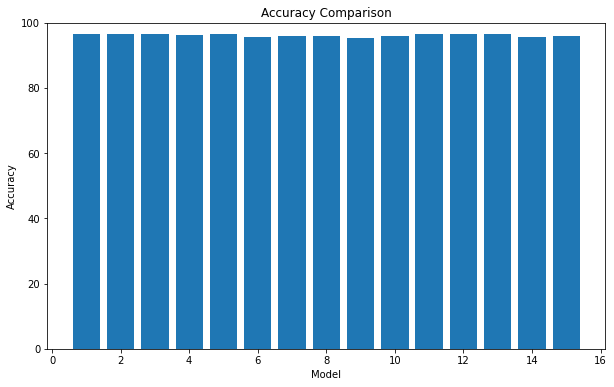

In [30]:
# Convert labels and accuracies_values to lists
if not isinstance(labels, list):
    labels = labels.tolist()
if not isinstance(accuracies_values, list):
    accuracies_values = accuracies_values.tolist()


plt.figure(figsize=(10, 6))
plt.bar(range(1,16), accuracies_values)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.ylim([0, 100])
plt.show()

In [41]:
for i in range (1, 16):
    print(f"Model {i}: {labels_graph[i-1]}, Accuracy: {accuracies_values[i-1]:.2f}%")

Model 1: 2 Layers, 50 Nodes, Tanh, Accuracy: 96.41%
Model 2: 2 Layers, 60 Nodes, Tanh, Accuracy: 96.63%
Model 3: 2 Layers, 75 Nodes, Tanh, Accuracy: 96.54%
Model 4: 3 Layers, 33 Nodes, Tanh, Accuracy: 96.10%
Model 5: 3 Layers, 50 Nodes, Tanh, Accuracy: 96.62%
Model 6: 2 Layers, 50 Nodes, Sigmoid, Accuracy: 95.53%
Model 7: 2 Layers, 60 Nodes, Sigmoid, Accuracy: 96.01%
Model 8: 2 Layers, 75 Nodes, Sigmoid, Accuracy: 95.91%
Model 9: 3 Layers, 33 Nodes, Sigmoid, Accuracy: 95.17%
Model 10: 3 Layers, 50 Nodes, Sigmoid, Accuracy: 95.86%
Model 11: 2 Layers, 50 Nodes, ReLU, Accuracy: 96.46%
Model 12: 2 Layers, 60 Nodes, ReLU, Accuracy: 96.67%
Model 13: 2 Layers, 75 Nodes, ReLU, Accuracy: 96.66%
Model 14: 3 Layers, 33 Nodes, ReLU, Accuracy: 95.70%
Model 15: 3 Layers, 50 Nodes, ReLU, Accuracy: 95.83%


In [61]:
max_accuracy = max(accuracies_values)
min_accuracy = min(accuracies_values)
best_model = accuracies_values.index(max_accuracy)
worst_model = accuracies_values.index(min_accuracy)
stddev = np.std(accuracies_values)
mean = np.mean(accuracies_values)
diff = max_accuracy - min_accuracy
print(f"Best Model: ({labels_graph[best_model]}) with accuracy: {max_accuracy:.2f}%")
print(f"Worst Model: ({labels_graph[worst_model]}) with accuracy: {min_accuracy:.2f}%")
print(f"Difference in accuracies: {diff:.2f}%")
print(f"Standard Deviation in accuracies: {stddev:.2f}%")
sig = diff/stddev
print(f"The difference is equivalant to {sig:.2f} standard deviations")
print("Hence the models are significantly different statistically")

Best Model: (2 Layers, 60 Nodes, ReLU) with accuracy: 96.67%
Worst Model: (3 Layers, 33 Nodes, Sigmoid) with accuracy: 95.17%
Difference in accuracies: 1.49%
Standard Deviation in accuracies: 0.45%
The difference is equivalant to 3.29 standard deviations
Hence the models are significantly different statistically
